In [8]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


character(0)

[1] "La moyenne empirique est de : 14.977000"


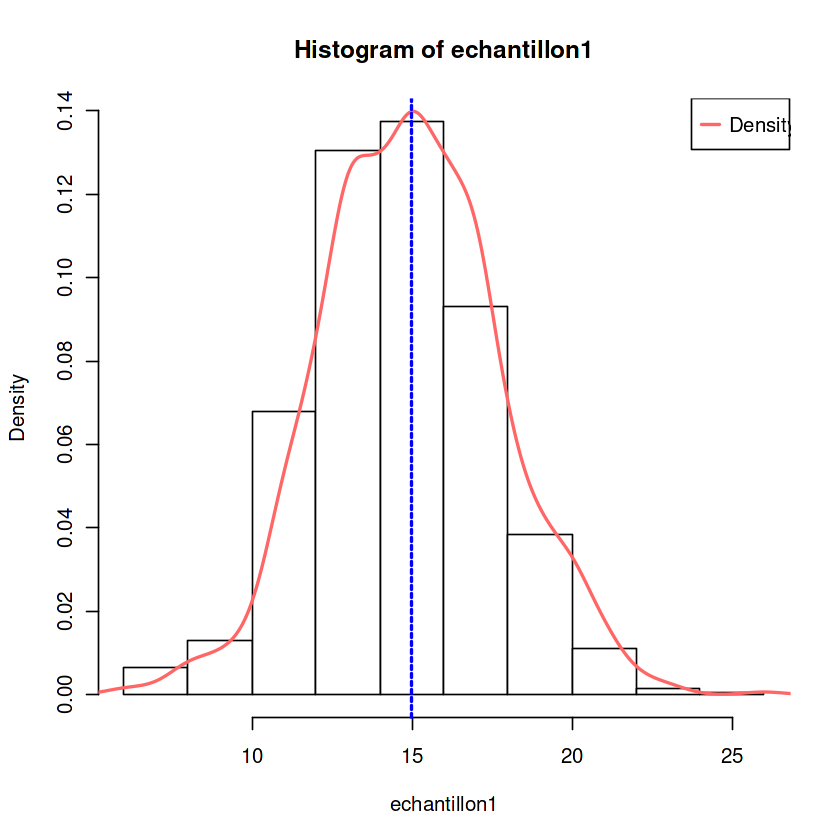

In [26]:
# Ici tous ces paramètres sont fixés par l'expérimentateur.
# On peut s'amuser à les changer pour observer leur impact sur le TCL

# 1er echantillon
n <- 100 #Plus n est grand, plus on augmente la vitesse de convergence
nobs <- 50 # Nombre d'observations
p <- 0.5 # Probabilité de succès
N <- 30 # Nombre d'essais 


# Pour visualiser, l'echantillon =>  il faut un histogramme

hist(echantillon1, col = "white", border = "black", probability = TRUE)

# You can then overlay a density plot on top of the histogram
lines(density(echantillon1), col = "#FF6666", lwd = 2)

# Adding labels and a title
xlabel <- "Value"
ylabel <- "Density"
title <- "Histogram and Density Plot of Binomial Distribution"
legend_text <- c("Density Plot")
# Adding a vertical line at the mean
abline(v = mean(echantillon1), col = "blue", lty = 2, lwd = 2)

# Adding a legend
legend("topright", legend = legend_text, col = "#FF6666", lty = 1, lwd = 2)


# mean = moyenne empirique
print(sprintf("La moyenne empirique est de : %f", mean(echantillon1)))

In [10]:
# Très bien, mais on veut plus qu'un seul tirage !
# On va donc chercher à répliquer l'expérience $nobs fois.
# (Attention ! On veut save uniquement la moyenne, pas l'echantillon)
echantillon_binomial <- replicate(nobs, mean(rbinom(n, N, p)))

#df est un diminutif pour "data frame"
df <- data.frame(bin = echantillon_binomial)
# Pour visualiser df, ici on peut utiliser print, l'appeler directement ou head pour voir uniquement les premières valeurs.
#print(df)
#df
head(df)

,bin
,<dbl>
1,15.047
2,15.140
3,14.944
4,15.004
5,14.887
6,14.954


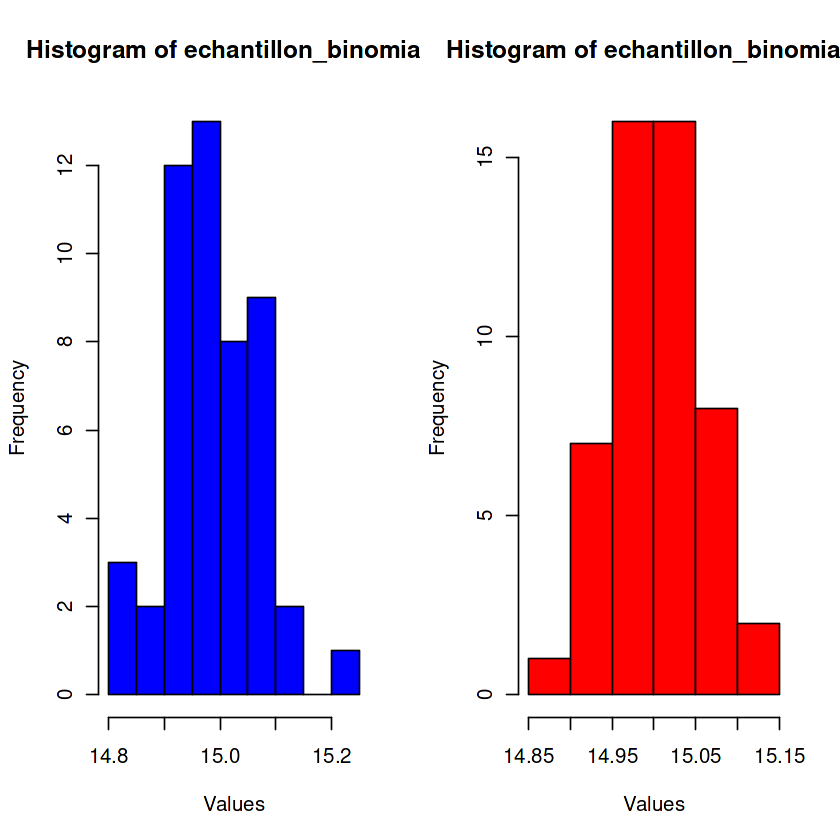

Mean of echantillon_binomial1: 14.98446 
Mean of echantillon_binomial2: 15.00513 
Variance of echantillon_binomial1: 0.006675709 
Variance of echantillon_binomial2: 0.002883266 
Shapiro Test for echantillon_binomial1 n = 1:
Test Statistic: 0.983517 
p-value: 0.7064637 

Shapiro Test for echantillon_binomial2 n = 2000:
Test Statistic: 0.9827813 
p-value: 0.6736285 



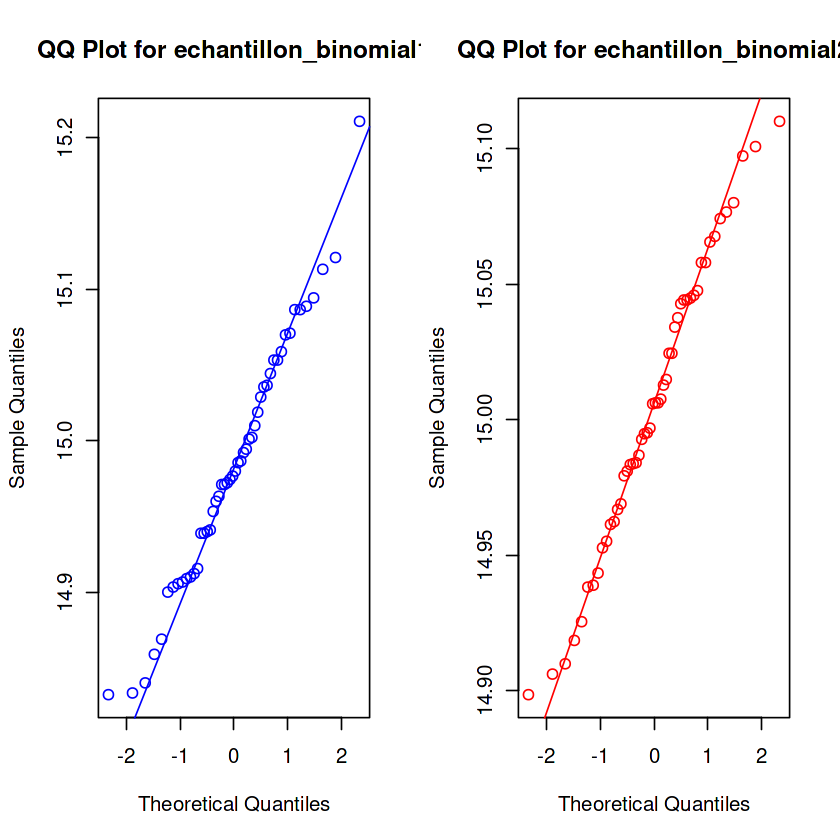

In [40]:
echantillon_binomial1 <- replicate(nobs, mean(rbinom(n - 99, N, p))) 
echantillon_binomial2 <- replicate(nobs, mean(rbinom(n + 1900 , N, p)))

df1 <- data.frame(n_1 = echantillon_binomial1)
df2 <- data.frame(n_2000 = echantillon_binomial2)

# Set up a 1x2 layout for the following plots
par(mfrow = c(1, 2))

# Plot histograms for df1 and df2
hist(df1$n_1, col = 'blue', main = 'Histogram of echantillon_binomial1', xlab = 'Values')
hist(df2$n_2000, col = 'red', main = 'Histogram of echantillon_binomial2', xlab = 'Values') 

# QQ plots
par(mfrow = c(1, 2))  # Set up a 1x2 layout for the following plots
qqnorm(df1$n_1, col = 'blue', main = 'QQ Plot for echantillon_binomial1')
qqline(df1$n_1, col = 'blue')

qqnorm(df2$n_2000, col = 'red', main = 'QQ Plot for echantillon_binomial2')
qqline(df2$n_2000, col = 'red')

# Calculate and print means
mean_df1 <- mean(df1$n_1)
mean_df2 <- mean(df2$n_2000)
cat("Mean of echantillon_binomial1:", mean_df1, "\n")
cat("Mean of echantillon_binomial2:", mean_df2, "\n")

# Calculate and print variances
var_df1 <- var(df1$n_1)
var_df2 <- var(df2$n_2000)
cat("Variance of echantillon_binomial1:", var_df1, "\n")
cat("Variance of echantillon_binomial2:", var_df2, "\n")

# check : 
# Shapiro Test for df1$n_1
shapiro_result_1 <- shapiro.test(df1$n_1)
cat("Shapiro Test for echantillon_binomial1 n = 1:\n")
cat("Test Statistic:", shapiro_result_1$statistic, "\n")
cat("p-value:", shapiro_result_1$p.value, "\n\n")

# Shapiro Test for df2$n_2000
shapiro_result_2 <- shapiro.test(df2$n_2000)
cat("Shapiro Test for echantillon_binomial2 n = 2000:\n")
cat("Test Statistic:", shapiro_result_2$statistic, "\n")
cat("p-value:", shapiro_result_2$p.value, "\n\n")


Warning message:
“Removed 100 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 100 rows containing non-finite values (`stat_density()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


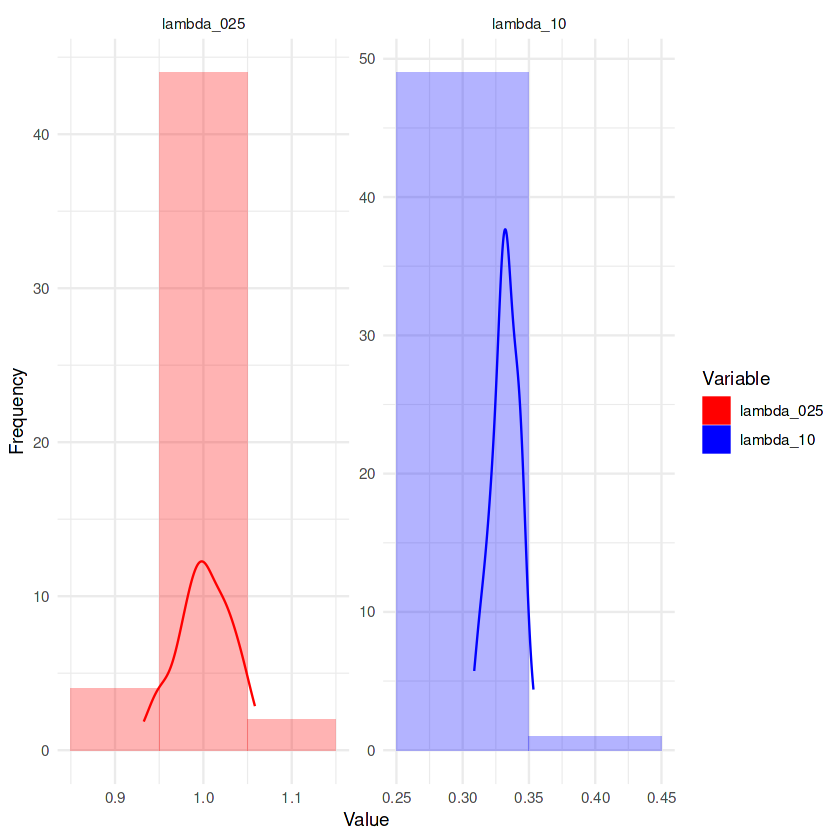

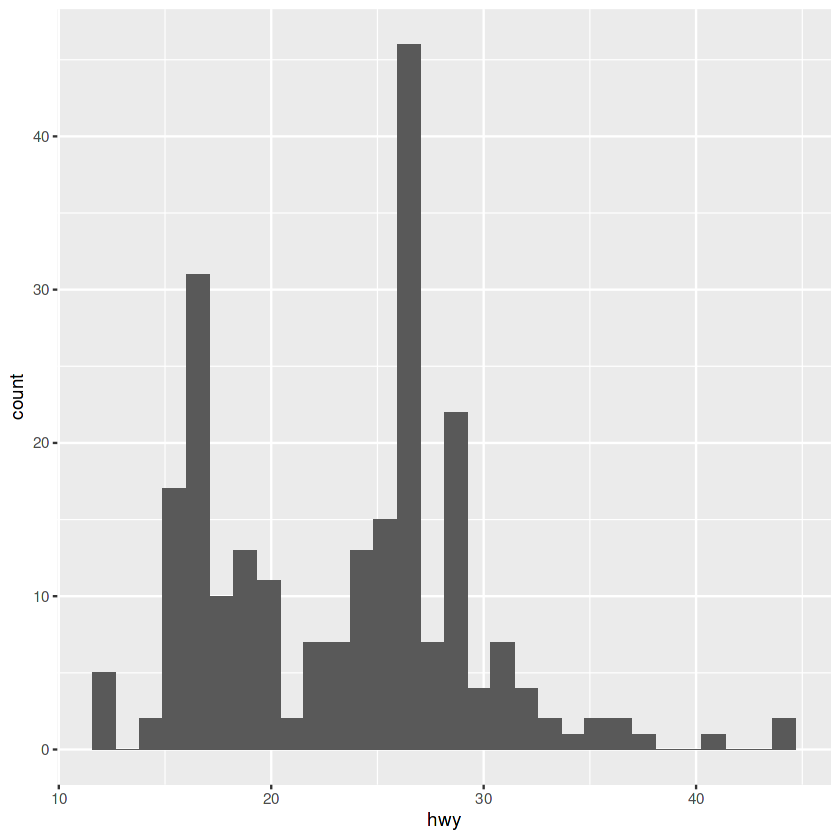

In [14]:
lambda <- 1 # Paramètre de la Loi Exponentielle
# Même procédé que pour la Loi Binomiale
echantillon_expo1 <- replicate(nobs, mean(rexp(n, lambda )))
echantillon_expo2 <- replicate(nobs, mean(rexp(n, lambda + 2)))

df1 <- data.frame(lambda_025 = echantillon_expo1)
df2 <- data.frame(lambda_10 = echantillon_expo2)

# Procédé d'affichage
df_tidy <- bind_rows(df1, df2) %>%
  pivot_longer(everything(), names_to = "Variable", values_to = "Value")

ggplot(df_tidy) +
  geom_histogram(aes(x = Value, fill = Variable), binwidth = 0.1, alpha = 0.3) +
  geom_density(aes(x = Value, color = Variable)) +
  facet_wrap(~ Variable, scales = "free") +
  labs(x = "Value", y = "Frequency") +
  scale_fill_manual(values = c("lambda_025" = "red", "lambda_10" = "blue")) +
  scale_color_manual(values = c("lambda_025" = "red", "lambda_10" = "blue")) +
  theme_minimal()

# Par la suite, on peut s'amuser à faire la même chose avec la loi de Cauchy qui ne suit pas les nécessités du TCL
#echantillon_cauchy <- replicate(nobs, mean(rcauchy(n, 0, scale = 1)))
#df <- data.frame(bin = echantillon_cauchy)


[1] 14.99868

[1] 0.009459977


	Shapiro-Wilk normality test

data:  df$bin
W = 0.9918, p-value = 0.979


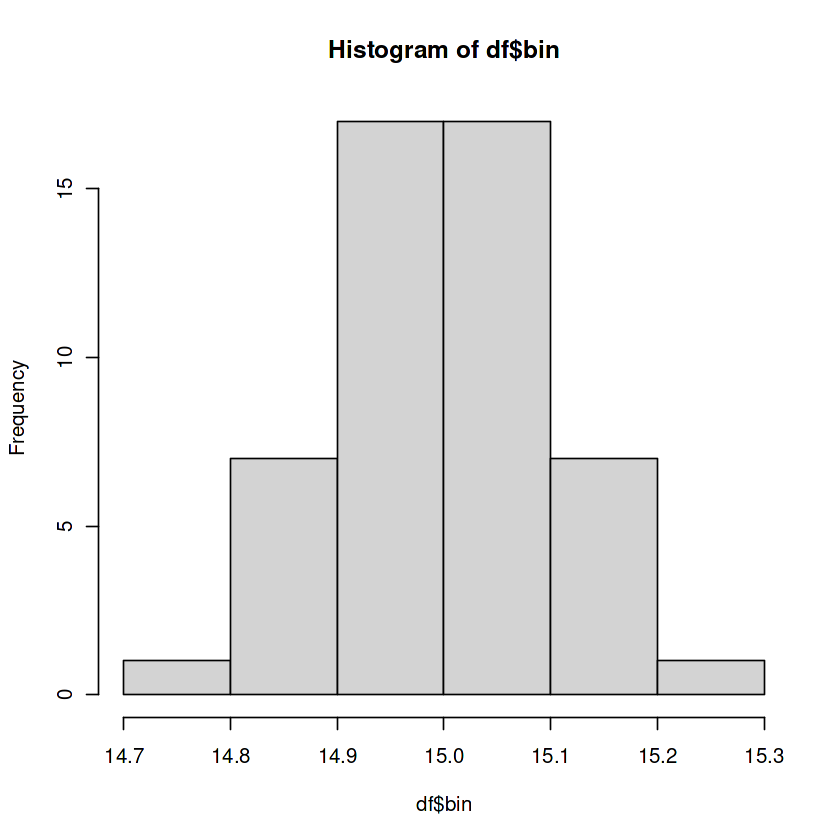

ERROR: Error in qqPlot(df$bin, col = "red"): could not find function "qqPlot"


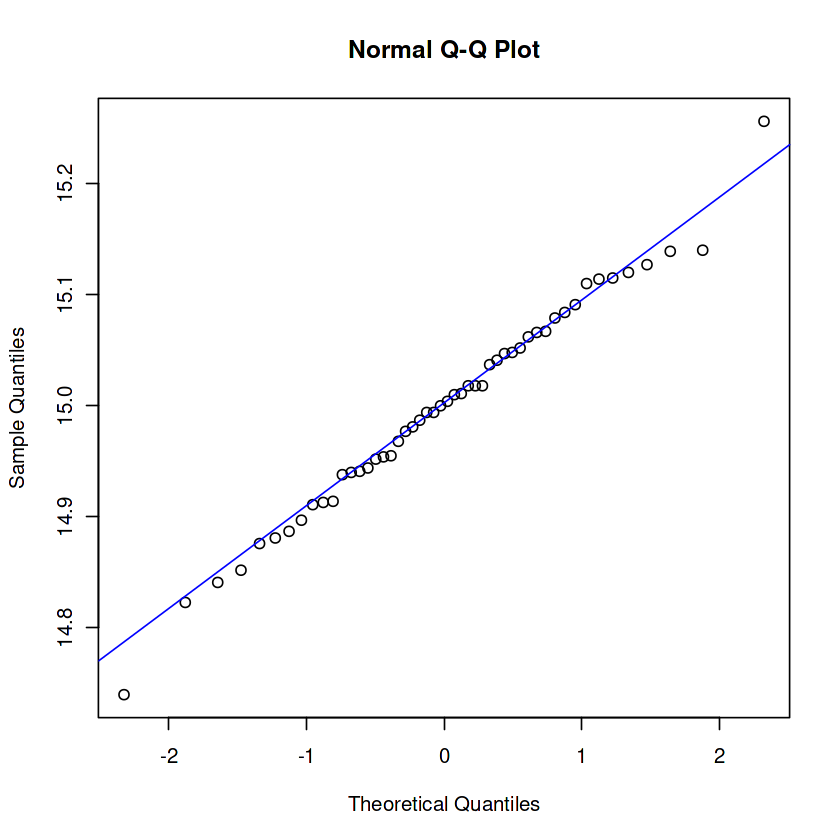

In [27]:
#Objectif : verif suit loi Normale
hist(df$bin)

mean(df$bin)
var(df$bin)

#test hypothese
# W = statistique de test
# p value = proba H0 accepte
# ici H0 = etre une loi normale (param inconnus)
#p value acceptee si p > 0.05
shapiro.test(df$bin)

# check : 
test <- shapiro.test(df$bin)

#graphiquement
#qqplot() / qqnorm() (qqnorm + generique)
qqnorm(df$bin)
qqline(df$bin, col = 'blue')
qqPlot(df$bin, col = 'red')

install.packages("car")
library(car) #qq plot plus joli


#Todo : remplacer la loi binomiale
# ajouter densite sur la courbe
# et la densite theorique 
# proportion de p value < 0.05 
# varie selon n , nobs ??
# utiliser gg plots au lieu de qq plot

df$norm <- replicate(nobs, mean(rbinom(n, N+20, p+0.3)))
qqPlot(df$bin, col = 'red')

#redaction : shapiro W = H0 = blbbala donc accepte ou refuse
# proportion de tests failed , depend de n , nobs
# graph de refus loi normale en fct de n
# vitesse de convergeance